<a href="https://colab.research.google.com/github/JustifiedTB/group-project-1/blob/main/Group_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2023_world_prosperity.csv to 2023_world_prosperity.csv
Saving cost_of_living_indices3.csv to cost_of_living_indices3.csv
Saving Hospital_Ranking_Data_2023.csv to Hospital_Ranking_Data_2023.csv
Saving WHR2023.csv to WHR2023.csv
Saving world-data-2023.csv to world-data-2023.csv


In [3]:
happiness = pd.read_csv('WHR2023.csv')
prosperity = pd.read_csv('2023_world_prosperity.csv')
cost_of_living = pd.read_csv('cost_of_living_indices3.csv')
info = pd.read_csv('world-data-2023.csv')
hosp_rank_df = pd.read_csv('Hospital_Ranking_Data_2023.csv')


In [4]:
display(happiness.info())
happiness.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

None

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [5]:
# Cleaning Happiness Dataframe

# List of columns to drop
columns_to_drop = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia']

# Drop the specified columns from the DataFrame
happy_cleaned = happiness.drop(columns=columns_to_drop)

# Rename columns for clarity
happy_cleaned.columns = ['Country', 'Ladder Score', 'Logged GDP per capita',
                         'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices',
                         'Generosity', 'Perceptions of Corruption',
                         'EB: Log GDP per capita', 'Explained by: Social support',
                         'EB: Healthy life expectancy',
                         'EB: Freedom to make life choices',
                         'EB: Generosity', 'EB: Perceptions of corruption',
                         'Dystopia/Residual']

# Display the cleaned DataFrame
happy_cleaned.head(10)


,Country,Ladder Score,Logged GDP per capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perceptions of Corruption,EB: Log GDP per capita,Explained by: Social support,EB: Healthy life expectancy,EB: Freedom to make life choices,EB: Generosity,EB: Perceptions of corruption,Dystopia/Residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,10.883,0.939,72.150,0.948,0.165,0.202,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,11.088,0.943,71.500,0.947,0.141,0.283,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,11.164,0.920,72.900,0.891,0.027,0.266,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,11.660,0.879,71.675,0.915,0.024,0.345,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,10.662,0.952,70.350,0.887,0.175,0.271,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [6]:
# Top 10 Countries by Happiness
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                 'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                 'New Zealand']

In [7]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

columns = ['Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption',
           'Ladder Score']

# Scale the columns to a range of 1 to 10 for all countries
scaler = MinMaxScaler(feature_range=(1, 10))
happy_scaled = happy_cleaned.copy()
happy_scaled[columns] = scaler.fit_transform(happy_cleaned[columns])

In [8]:
# # Visualizing Top 5 countries for 6 determinant columns

# import seaborn as sns
# import matplotlib.cm as cm
# from itertools import cycle

# # Step 1: Create a list of all countries that appear in the top five for each column
# top_countries = set()
# for col in columns:
#     top_countries.update(happy_scaled.nlargest(5, col)['Country'])

# # Step 2: Assign each unique country a color from tab20 and then tab20c if needed
# colors1 = cm.get_cmap('tab20', 20).colors
# colors2 = cm.get_cmap('tab20c', 20).colors
# all_colors = list(colors1) + list(colors2)
# color_map = {country: color for country, color in zip(top_countries, all_colors)}

# # Step 3: Function to plot top 5 countries for a given column
# def plot_top5(df, column, ax):
#     top5 = df[['Country', column]].nlargest(5, column)
#     colors = [color_map[country] for country in top5['Country']]
#     ax.bar(top5['Country'], top5[column], color=colors)
#     ax.set_xlabel('Country')
#     ax.set_ylabel('Scaled Scores (1-10)')
#     ax.set_title(f'Top 5 Countries by {column}')
#     ax.tick_params(axis='x', rotation=45)

# # Create subplots
# fig, axes = plt.subplots(4, 2, figsize=(15, 20))
# fig.tight_layout(pad=5.0)

# # Loop through each column and create a bar graph
# for i, col in enumerate(columns):
#     ax = axes[i // 2, i % 2]
#     plot_top5(happy_scaled, col, ax)

# # Remove the empty subplot
# fig.delaxes(axes[3, 1])

# # Show plot
# plt.show()

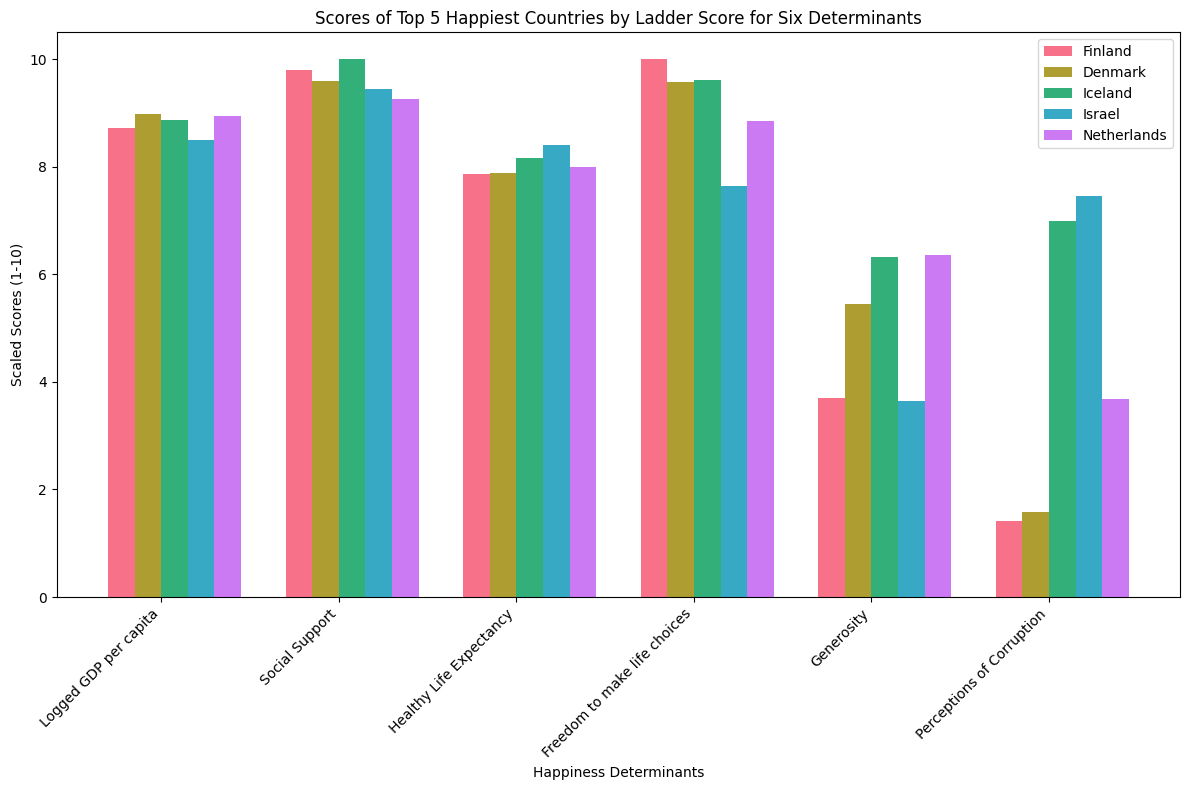

In [11]:
# Visualizing the Top5 Happiest Countries in the 6 Determinant

import seaborn as sns
import matplotlib.cm as cm
from itertools import cycle

top_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands']
columns_to_plot = ['Logged GDP per capita', 'Social Support', 'Healthy Life Expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of Corruption']


# Filter the dataframe for the top countries
top_df_scaled = happy_scaled[happy_scaled['Country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_df_scaled[top_df_scaled['Country'] == country][columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Happiness Determinants')
plt.ylabel('Scaled Scores (1-10)')
plt.title('Scores of Top 5 Happiest Countries by Ladder Score for Six Determinants')
plt.xticks([p + 1.5 * bar_width for p in x], columns_to_plot, rotation=45, ha='right')
plt.legend(top_countries)
plt.tight_layout()

# Show plot
plt.show()

In [12]:
display(prosperity.info())
prosperity.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

None

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
5,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49
6,Luxembourg,81.83,96.32,89.20,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
7,Iceland,81.02,91.64,88.74,83.30,77.75,79.20,72.86,76.07,69.92,93.82,82.72,85.19,71.01
8,Germany,80.81,87.92,87.70,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69
9,New Zealand,80.47,85.07,87.56,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71


In [13]:
prosperity.columns = ['Country', 'Avg Score', 'Safety/Security', 'Personal Freedom',
       'Governance', 'Social Capital', 'Investment Environment',
       'Enterprise Conditions', 'Market Access Infrastructure',
       'Economic Quality', 'Living Conditions', 'Health', 'Education',
       'Natural Environment']

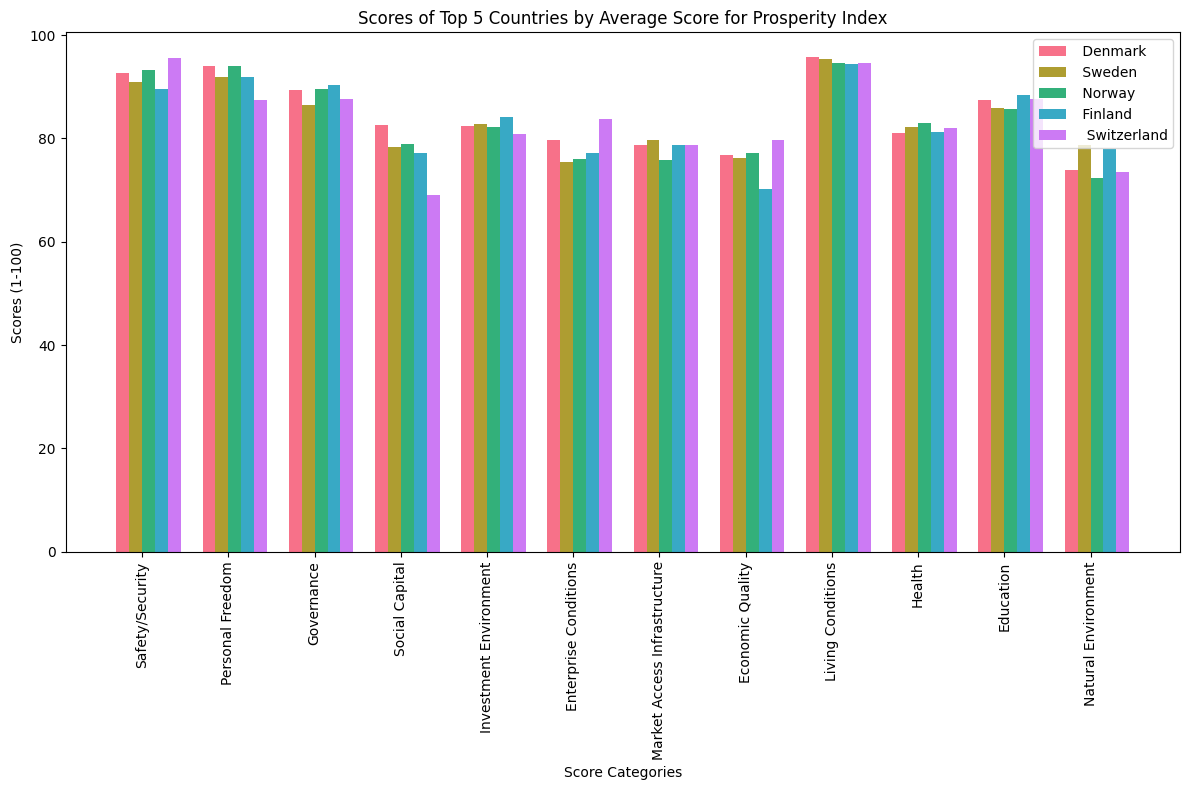

In [14]:
# Get the list of top 5 countries
top_5_prosp = prosperity.sort_values('Avg Score', ascending=False).head(5)
top_countries_prosp = top_5_prosp['Country'].tolist()

prosp_columns_to_plot = ['Safety/Security', 'Personal Freedom',
       'Governance', 'Social Capital', 'Investment Environment',
       'Enterprise Conditions', 'Market Access Infrastructure', 'Economic Quality',
       'Living Conditions', 'Health', 'Education', 'Natural Environment']

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(prosp_columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries_prosp))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries_prosp, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_5_prosp[top_5_prosp['Country'] == country][prosp_columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Score Categories')
plt.ylabel('Scores (1-100)')
plt.title('Scores of Top 5 Countries by Average Score for Prosperity Index')
plt.xticks([p + 1.5 * bar_width for p in x], prosp_columns_to_plot, rotation=90, ha='center')
plt.legend(top_countries_prosp)
plt.tight_layout()

# Show plot
plt.show()

In [15]:
display(info.info())
info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

None

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [16]:
info.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [17]:
# World Data Dataframe columns to drop

info_cleaned = info.drop(columns=['Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Largest city',
       'Minimum wage', 'Official language',
       'Tax revenue (%)', 'Total tax rate',
       'Latitude', 'Longitude'])



# Clean population column
info_cleaned['Population'] = info['Population'].str.replace('\xa0', ' ')  # Replace non-breaking spaces with regular spaces
info_cleaned['Population'] = info_cleaned['Population'].str.replace(' ', '')  # Remove any spaces
info_cleaned['Population'] = pd.to_numeric(info_cleaned['Population'].str.replace(',', ''), errors='coerce')  # Remove commas and convert to numeric

# Cleaning Columns and Converting to floats for Analysis
def clean_and_convert(series):
     return pd.to_numeric(series.str.replace('%', '').str.strip(), errors='coerce').astype(float)

columns_to_clean = [
    'Gross primary education enrollment (%)',
    'Gross tertiary education enrollment (%)',
    'Population: Labor force participation (%)',
    'Out of pocket health expenditure'
    ]

for col in columns_to_clean:
    info_cleaned[col] = clean_and_convert(info_cleaned[col])

# Replace NaN with zero
info_cleaned.fillna(0, inplace=True)

# Check data types
print(info_cleaned.dtypes)

# Check for any remaining NaN values
print(info_cleaned.isna().sum())

Country                                       object
Birth Rate                                   float64
Fertility Rate                               float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      float64
Infant mortality                             float64
Life expectancy                              float64
Maternal mortality ratio                     float64
Out of pocket health expenditure             float64
Physicians per thousand                      float64
Population                                   float64
Population: Labor force participation (%)    float64
Unemployment rate                             object
Urban_population                              object
dtype: object
Country                                      0
Birth Rate                                   0
Fertility Rate                               0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mo

In [18]:
info_cleaned.head()

,Country,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Unemployment rate,Urban_population
0,Afghanistan,32.49,4.47,104.0,9.7,47.9,64.5,638.0,78.4,0.28,38041754.0,48.9,11.12%,"9,797,273"
1,Albania,11.78,1.62,107.0,55.0,7.8,78.5,15.0,56.9,1.20,2854191.0,55.7,12.33%,"1,747,593"
2,Algeria,24.28,3.02,109.9,51.4,20.1,76.7,112.0,28.1,1.72,43053054.0,41.2,11.70%,"31,510,100"
3,Andorra,7.20,1.27,106.4,0.0,2.7,0.0,0.0,36.4,3.33,77142.0,0.0,0,"67,873"
4,Angola,40.73,5.52,113.5,9.3,51.6,60.8,241.0,33.4,0.21,31825295.0,77.5,6.89%,"21,061,025"


In [19]:
# Your list of top 10 countries
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                   'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                   'New Zealand']

# Create a new dataframe to store the values for the top 10 countries
top10_info = info_cleaned[info_cleaned['Country'].isin(top10_countries)].set_index('Country')

# Sort the dataframe by country name
top10_info = top10_info.loc[top10_countries]

# Display the dataframe
display(top10_info)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Unemployment rate,Urban_population
Country,,,,,,,,,,,,,
Finland,8.60,1.41,100.2,88.2,1.4,81.7,3.0,19.9,3.81,5520314.0,59.1,6.59%,"4,716,888"
Denmark,10.60,1.73,101.3,80.6,3.6,81.0,4.0,13.7,4.01,5818553.0,62.2,4.91%,"5,119,978"
Iceland,12.00,1.71,100.4,71.8,1.5,82.7,4.0,17.0,4.08,361313.0,75.0,2.84%,"339,110"
Israel,20.80,3.09,104.9,63.4,3.0,82.8,3.0,24.4,4.62,9053300.0,64.0,3.86%,"8,374,393"
Netherlands,9.70,1.59,104.2,85.0,3.3,81.8,5.0,12.3,3.61,17332850.0,63.6,3.20%,"15,924,729"
Sweden,11.40,1.76,126.6,67.0,2.2,82.5,4.0,15.2,3.98,10285453.0,64.6,6.48%,"9,021,165"
Norway,10.40,1.56,100.3,82.0,2.1,82.8,2.0,14.3,2.92,5347896.0,63.8,3.35%,"4,418,218"
Switzerland,10.00,1.52,105.2,59.6,3.7,83.6,5.0,28.3,4.30,8574832.0,68.3,4.58%,"6,332,428"
Luxembourg,10.30,1.37,102.3,19.2,1.9,82.1,5.0,10.6,3.01,645397.0,59.3,5.36%,"565,488"


In [20]:
# Your list of top 10 countries
top10_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                   'Sweden', 'Norway', 'Switzerland', 'Luxembourg',
                   'New Zealand']

# Columns where higher is better
higher_better = ['Birth Rate', 'Fertility Rate',
                 'Gross primary education enrollment (%)',
                 'Gross tertiary education enrollment (%)',
                 'Life expectancy', 'Physicians per thousand',
                 'Population']

# Columns where lower is better
lower_better = ['Infant mortality', 'Maternal mortality ratio',
                'Out of pocket health expenditure']

def rank_column(series, ascending=True, ignore_zeros=False):
    if ignore_zeros:
        series = series.replace(0, np.nan)
    return series.rank(method='min', ascending=ascending, na_option='bottom')

# Combine all columns we're interested in
columns_of_interest = higher_better + lower_better

# Create an empty dataframe to store the rankings
top10_rankings = pd.DataFrame(index=top10_countries, columns=columns_of_interest)

for column in columns_of_interest:
    if column in higher_better:
        rankings = rank_column(info_cleaned[column], ascending=False)
    else:  # column in lower_better
        rankings = rank_column(info_cleaned[column], ascending=True, ignore_zeros=True)

    # Create a Series with country as index and rankings as values
    rankings_series = pd.Series(rankings.values, index=info_cleaned['Country'])

    # Filter rankings for top10 countries and convert to int
    top10_rankings[column] = rankings_series[top10_countries].astype(int)

# Sort the dataframe by index to match the order of top10_countries
top10_rankings = top10_rankings.reindex(top10_countries)

# Display the rankings
display(top10_rankings)


,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Finland,179,172,123,8,21,27,115,1,5,59
Denmark,148,134,104,20,27,21,113,31,10,33
Iceland,133,139,117,27,10,19,171,2,10,47
Israel,75,58,70,45,8,11,96,22,5,76
Netherlands,166,153,75,14,20,30,66,27,14,28
Sweden,141,127,6,38,13,23,87,10,10,40
Norway,151,156,120,17,8,48,118,8,1,34
Switzerland,161,161,67,53,3,15,99,35,14,89
Luxembourg,154,176,97,114,17,44,162,6,14,21
New Zealand,136,139,127,17,18,31,123,41,35,31


In [21]:
top10_rankings.sort_values(by='Out of pocket health expenditure', ascending=True, inplace=True)
top10_rankings

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Luxembourg,154,176,97,114,17,44,162,6,14,21
Netherlands,166,153,75,14,20,30,66,27,14,28
New Zealand,136,139,127,17,18,31,123,41,35,31
Denmark,148,134,104,20,27,21,113,31,10,33
Norway,151,156,120,17,8,48,118,8,1,34
Sweden,141,127,6,38,13,23,87,10,10,40
Iceland,133,139,117,27,10,19,171,2,10,47
Finland,179,172,123,8,21,27,115,1,5,59
Israel,75,58,70,45,8,11,96,22,5,76
Switzerland,161,161,67,53,3,15,99,35,14,89


In [22]:
# Creating a ranking dataframe from the info_cleaned dataframe
# This contains the rank for each country for certain columns

def rank_column(series, ascending=True, ignore_zeros=False):
    if ignore_zeros:
        series = series.replace(0, np.nan)
    return series.rank(method='min', ascending=ascending, na_option='bottom')

# Combine all columns we're interested in
columns_of_interest = higher_better + lower_better

# Create an empty dataframe to store the rankings
info_ranked = pd.DataFrame(index=info_cleaned.index, columns=columns_of_interest)

for column in columns_of_interest:
    if column in higher_better:
        rankings = rank_column(info_cleaned[column], ascending=False)
    else:  # column in lower_better
        rankings = rank_column(info_cleaned[column], ascending=True, ignore_zeros=True)

    # Assign rankings to info_ranked
    info_ranked[column] = rankings.astype(int)

# Add the 'Country' column to info_ranked
info_ranked['Country'] = info_cleaned['Country']

# Set 'Country' as the index
info_ranked.set_index('Country', inplace=True)

display(info_ranked.head())


,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Country,,,,,,,,,,
Afghanistan,31,25,77,148,153,144,37,164,172,185
Albania,137,147,52,57,39,102,136,64,48,166
Algeria,61,60,36,62,59,86,34,114,115,88
Andorra,186,181,57,184,188,35,184,17,182,111
Angola,6,6,23,149,172,150,45,172,139,101


In [23]:
info_ranked.sort_values(by='Physicians per thousand', ascending=True, inplace=True)
info_ranked.head(10)

,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure
Country,,,,,,,,,,
Cuba,158,147,99,74,37,1,81,35,75,189
Georgia,127,107,145,43,92,2,129,67,61,168
Monaco,189,189,189,184,188,3,188,14,182,9
Lithuania,161,146,81,26,69,4,138,27,30,97
San Marino,187,183,47,73,1,5,190,3,182,52
Greece,182,177,135,1,24,6,85,31,5,104
Belarus,164,168,116,11,87,7,94,14,1,103
Austria,166,165,90,13,22,8,97,20,14,51
Portugal,180,175,61,43,24,9,88,23,30,85


In [24]:
display(cost_of_living.info())
cost_of_living.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


None

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [25]:
# Rank the Cost of Living Index and append to top10_rankings df
# Cost of living is already the ordered index so ranking function is not needed.

# Create a dictionary to store the rankings
col_rankings = {}

# Find the rank for each country in top10_countries
for country in top10_countries:
    try:
        # Find the index of the country and add 1 to get the rank
        rank = cost_of_living[cost_of_living['Country'] == country].index[0] + 1
        col_rankings[country] = rank
    except IndexError:
        # If the country is not found, assign NaN
        col_rankings[country] = pd.np.nan

# Add the new column to top10_rankings
top10_rankings['Cost of Living Index'] = top10_rankings.index.map(col_rankings)

# Display the updated dataframe
display(top10_rankings)


,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure,Cost of Living Index
Luxembourg,154,176,97,114,17,44,162,6,14,21,20
Netherlands,166,153,75,14,20,30,66,27,14,28,18
New Zealand,136,139,127,17,18,31,123,41,35,31,13
Denmark,148,134,104,20,27,21,113,31,10,33,7
Norway,151,156,120,17,8,48,118,8,1,34,6
Sweden,141,127,6,38,13,23,87,10,10,40,25
Iceland,133,139,117,27,10,19,171,2,10,47,3
Finland,179,172,123,8,21,27,115,1,5,59,17
Israel,75,58,70,45,8,11,96,22,5,76,19
Switzerland,161,161,67,53,3,15,99,35,14,89,1


In [26]:
countries_list = prosperity['Country'].tolist()
countries_list


['\xa0Denmark',
 '\xa0Sweden',
 '\xa0Norway',
 '\xa0Finland',
 '\xa0\xa0Switzerland',
 '\xa0Netherlands',
 '\xa0Luxembourg',
 '\xa0Iceland',
 '\xa0Germany',
 '\xa0New Zealand',
 '\xa0Ireland',
 '\xa0United Kingdom',
 '\xa0Canada',
 '\xa0Austria',
 '\xa0Australia',
 '\xa0Japan',
 '\xa0Singapore',
 '\xa0Belgium',
 '\xa0United States',
 '\xa0Taiwan',
 '\xa0Estonia',
 '\xa0Hong Kong',
 '\xa0France',
 '\xa0Spain',
 '\xa0Czech Republic',
 '\xa0Portugal',
 '\xa0Slovenia',
 '\xa0Malta',
 '\xa0South Korea',
 '\xa0Italy',
 '\xa0Latvia',
 '\xa0Lithuania',
 '\xa0Israel',
 '\xa0Cyprus',
 '\xa0Slovakia',
 '\xa0Chile',
 '\xa0Poland',
 '\xa0Uruguay',
 '\xa0Costa Rica',
 '\xa0Greece',
 '\xa0Croatia',
 '\xa0Hungary',
 '\xa0Malaysia',
 '\xa0United Arab Emirates',
 '\xa0Romania',
 '\xa0Qatar',
 '\xa0Mauritius',
 '\xa0Bulgaria',
 '\xa0Montenegro',
 '\xa0Panama',
 '\xa0Seychelles',
 '\xa0Serbia',
 '\xa0Georgia',
 '\xa0China',
 '\xa0Macedonia',
 '\xa0Trinidad and Tobago',
 '\xa0Jamaica',
 '\xa0Argentina',
 '

In [27]:
# From the prosperity df, rank the appropriate columns
# append to the top10_rankings df

# List of the columns in prosperity:
# ['Country', 'Avg Score', 'Safety/Security', 'Personal Freedom',
#        'Governance', 'Social Capital', 'Investment Environment',
#        'Enterprise Conditions', 'Market Access Infrastructure',
#        'Economic Quality', 'Living Conditions', 'Health', 'Education',
#        'Natural Environment']


# list of the columns we want to rank
prosperity_columns = ['Avg Score', 'Safety/Security', 'Personal Freedom',
                      'Living Conditions', 'Health', 'Education',
                      'Natural Environment']

# Create a new dataframe to store the rankings
prosperity_rankings = pd.DataFrame(index=top10_countries, columns=prosperity_columns)

# Clean the country names in the prosperity dataframe
prosperity['Country'] = prosperity['Country'].str.strip()

# Create a mapping between top10_countries and the actual country names in prosperity
country_mapping = {country: country for country in top10_countries if country in prosperity['Country'].values}

for column in prosperity_columns:
    # Rank the column in descending order (higher is better)
    rankings = prosperity[column].rank(method='min', ascending=False)

    # Create a Series with country as index and rankings as values
    rankings_series = pd.Series(rankings.values, index=prosperity['Country'])

    # Filter rankings for top10 countries and convert to int
    for country in top10_countries:
        if country in country_mapping:
            prosperity_rankings.loc[country, column] = int(rankings_series[country])
        else:
            prosperity_rankings.loc[country, column] = pd.np.nan

# Add these new rankings to the existing top10_rankings dataframe
top10_rankings = pd.concat([top10_rankings, prosperity_rankings], axis=1)

# Display the updated rankings
display(top10_rankings)

# Print any countries that weren't found
missing_countries = set(top10_countries) - set(country_mapping.keys())
if missing_countries:
    print(f"Warning: The following countries were not found in the prosperity dataframe: {', '.join(missing_countries)}")


,Birth Rate,Fertility Rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Physicians per thousand,Population,Infant mortality,Maternal mortality ratio,Out of pocket health expenditure,Cost of Living Index,Avg Score,Safety/Security,Personal Freedom,Living Conditions,Health,Education,Natural Environment
Luxembourg,154,176,97,114,17,44,162,6,14,21,20,7,1,6,6,12,36,10
Netherlands,166,153,75,14,20,30,66,27,14,28,18,6,9,5,1,11,6,39
New Zealand,136,139,127,17,18,31,123,41,35,31,13,10,32,11,30,25,18,11
Denmark,148,134,104,20,27,21,113,31,10,33,7,1,6,2,2,16,5,5
Norway,151,156,120,17,8,48,118,8,1,34,6,3,3,1,4,7,10,9
Sweden,141,127,6,38,13,23,87,10,10,40,25,2,10,4,3,9,8,1
Iceland,133,139,117,27,10,19,171,2,10,47,3,8,8,7,10,8,11,13
Finland,179,172,123,8,21,27,115,1,5,59,17,4,15,3,7,15,2,2
Israel,75,58,70,45,8,11,96,22,5,76,19,33,124,49,12,6,26,96
Switzerland,161,161,67,53,3,15,99,35,14,89,1,5,2,12,5,10,4,6


In [28]:
# Convert newly added columns for visualization

# List of columns to convert
columns_to_convert = ['Avg Score', 'Safety/Security', 'Personal Freedom',
                      'Living Conditions', 'Health', 'Education',
                      'Natural Environment']

# Convert columns to int
for column in columns_to_convert:
    top10_rankings[column] = top10_rankings[column].astype(int)

# Verify the changes
display(top10_rankings.columns)
top10_rankings.info()

Index(['Birth Rate', 'Fertility Rate',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Life expectancy',
       'Physicians per thousand', 'Population', 'Infant mortality',
       'Maternal mortality ratio', 'Out of pocket health expenditure',
       'Cost of Living Index', 'Avg Score', 'Safety/Security',
       'Personal Freedom', 'Living Conditions', 'Health', 'Education',
       'Natural Environment'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Luxembourg to Switzerland
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Birth Rate                               10 non-null     int64
 1   Fertility Rate                           10 non-null     int64
 2   Gross primary education enrollment (%)   10 non-null     int64
 3   Gross tertiary education enrollment (%)  10 non-null     int64
 4   Life expectancy                          10 non-null     int64
 5   Physicians per thousand                  10 non-null     int64
 6   Population                               10 non-null     int64
 7   Infant mortality                         10 non-null     int64
 8   Maternal mortality ratio                 10 non-null     int64
 9   Out of pocket health expenditure         10 non-null     int64
 10  Cost of Living Index                     10 non-null     int64


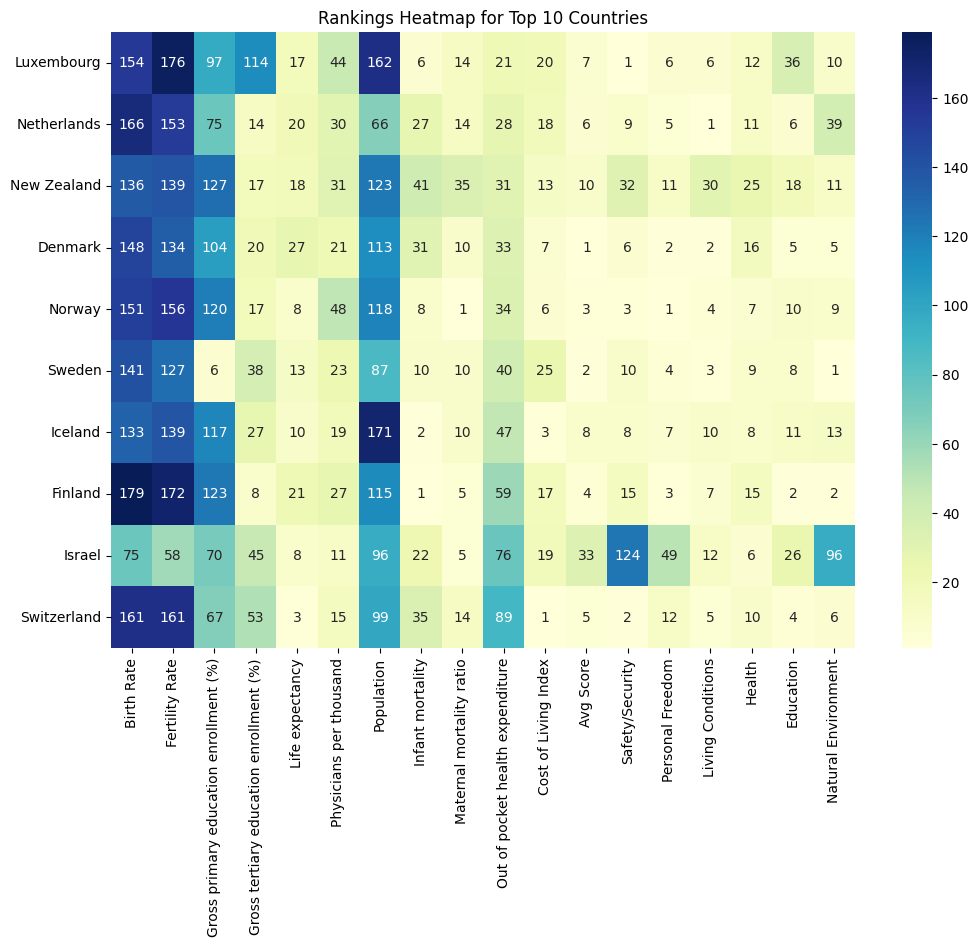

In [29]:
# Visualizations for top10_rankings
# Heatmap
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(top10_rankings, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Rankings Heatmap for Top 10 Countries")
plt.show()

In [27]:
# # Radar plot
# import plotly.graph_objects as go

# categories = top10_rankings.columns
# max_rank = top10_rankings.max().max()

# fig = go.Figure()

# for country in top10_rankings.index:
#     fig.add_trace(go.Scatterpolar(
#         r=[max_rank + 1 - rank for rank in top10_rankings.loc[country]],  # Invert ranks
#         theta=categories,
#         fill='toself',
#         name=country
#     ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, max_rank]
#     )),
#   showlegend=True,
#   title="Country Performance Across Categories (Outer is Better)"
# )
# fig.show()

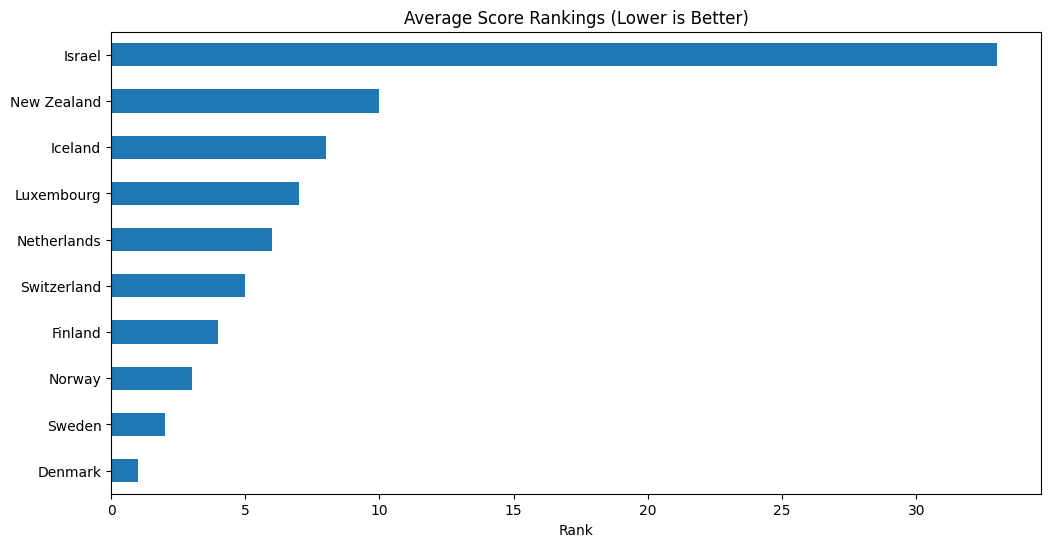

In [28]:
# # Bar Plot
# plt.figure(figsize=(12, 6))
# top10_rankings['Avg Score'].sort_values(ascending=False).plot(kind='barh')
# plt.title("Average Score Rankings (Lower is Better)")
# plt.xlabel("Rank")
# plt.gca().invert_yaxis()  # Invert y-axis to show best performers at the top
# plt.show()

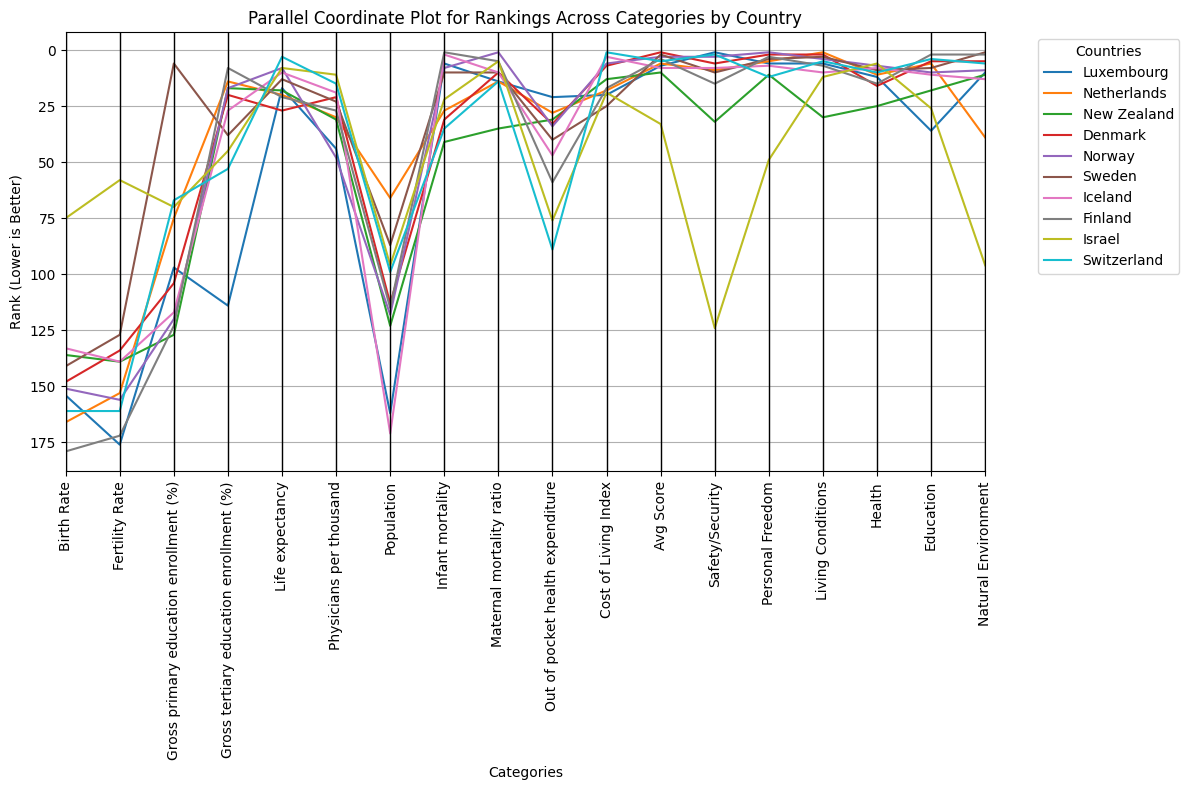

In [29]:
# # Parallel Coordinates
# from pandas.plotting import parallel_coordinates
# # Reset index so we have a 'Country' column
# para_coord_df = top10_rankings.reset_index()

# plt.figure(figsize=(12, 8))
# parallel_coordinates(para_coord_df, 'index', colormap=plt.get_cmap('tab10'))

# plt.title('Parallel Coordinate Plot for Rankings Across Categories by Country')
# plt.xlabel('Categories')
# plt.ylabel('Rank (Lower is Better)')
# plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=90)
# plt.grid(True)
# plt.gca().invert_yaxis()  # Invert y-axis to have lower ranks at the top
# plt.tight_layout()
# plt.show()

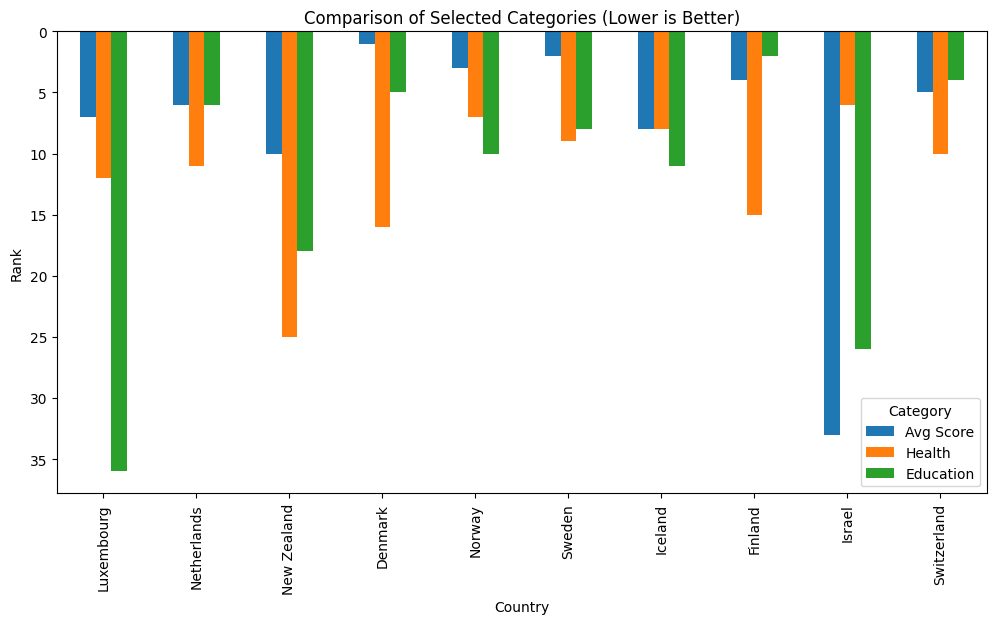

In [31]:
# # Grouped Bar Chart
# selected_categories = ['Avg Score', 'Health', 'Education']
# ax = top10_rankings[selected_categories].plot(kind='bar', figsize=(12, 6))
# plt.title("Comparison of Selected Categories (Lower is Better)")
# plt.xlabel("Country")
# plt.ylabel("Rank")
# plt.legend(title="Category")
# ax.invert_yaxis()  # Invert y-axis so lower (better) ranks are higher
# plt.show()

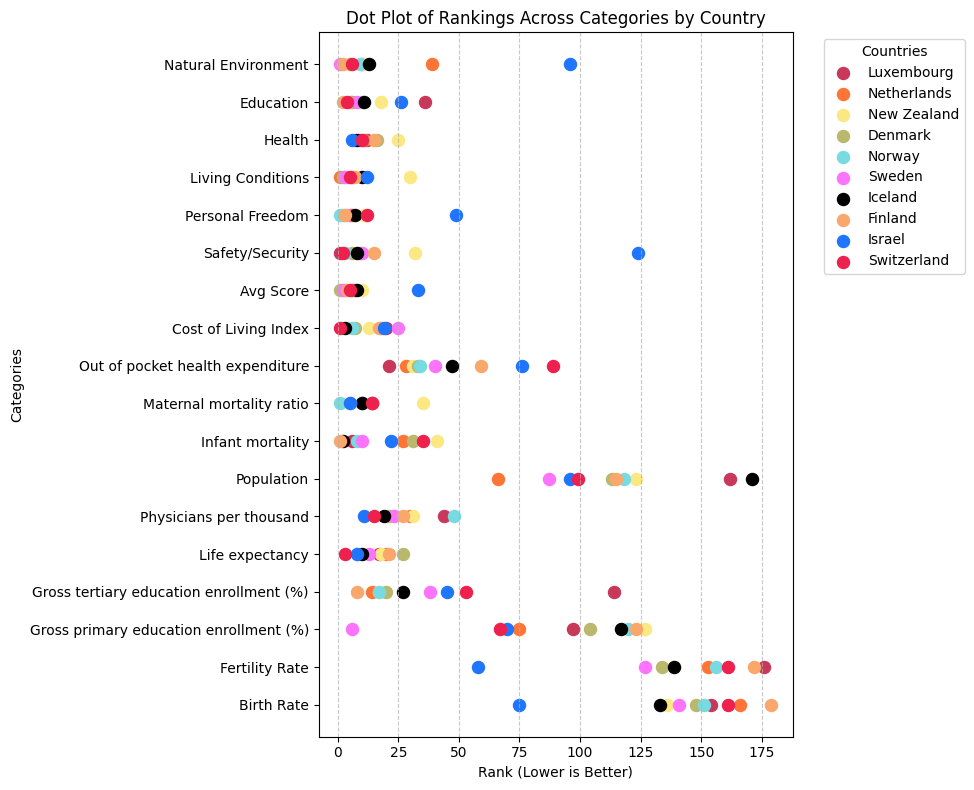

In [30]:
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 8))
crayon_list = ['Maroon', 'Orange', 'Yellow', 'Olive Green',
               'Aquamarine', 'Pink Flamingo', 'Black', 'Tan',
               'Blue', 'Red', 'Green']
# Create a color palette with a unique color for each country
colors = sns.crayon_palette(crayon_list)

# Create a dictionary mapping countries to colors
color_dict = dict(zip(top10_rankings.index, colors))

# Plot each country's data
for country in top10_rankings.index:
    plt.scatter(top10_rankings.loc[country],
                range(len(top10_rankings.columns)),
                label=country,
                color=color_dict[country],
                s=75)  # s is the size of the dots

# Customize the plot
plt.yticks(range(len(top10_rankings.columns)), top10_rankings.columns)
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Categories')
plt.title('Dot Plot of Rankings Across Categories by Country')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Countries')

# Invert x-axis so that better ranks (lower numbers) are on the left
#plt.gca().invert_xaxis()

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Compare rankings from Happiness (Health) with Prosperity (Health)


def get_rankings(df, column, countries, ascending=False):
    # Rank the specified column
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Filter for the specified countries and convert to int
    return rankings[countries].astype(int)

# Get rankings for 'Healthy Life Expectancy' from happy_cleaned
healthy_life_rankings = get_rankings(happy_cleaned, 'Healthy Life Expectancy', top10_countries)

# Get rankings for 'Health' from prosperity
health_rankings = get_rankings(prosperity, 'Health', top10_countries)

# Create the new dataframe with country names as the index
new_df = pd.DataFrame({
    'Healthy Life Expectancy Rank': healthy_life_rankings,
    'Health Rank': health_rankings
})

# Ensure the index is named 'Country'
new_df.index.name = 'Country'

display(new_df)

,Healthy Life Expectancy Rank,Health Rank
Country,,
Finland,22,15
Denmark,20,16
Iceland,11,8
Israel,7,6
Netherlands,15,11
Sweden,10,9
Norway,16,7
Switzerland,5,10
Luxembourg,13,12


In [32]:

def get_rankings(df, column, countries, ascending=False):
    # Rank the specified column
    df['Rank'] = df[column].rank(method='min', ascending=ascending)

    # Create a series with country as index and rank as value
    rankings = df.set_index('Country')['Rank']

    # Filter for the specified countries and convert to int
    return rankings[countries].astype(int)

# Get rankings for 'Ladder Score' from happy_cleaned
ladder_score_rankings = get_rankings(happy_cleaned, 'Ladder Score', top10_countries, ascending=False)

# Get rankings for 'Avg Score' from prosperity
avg_score_rankings = get_rankings(prosperity, 'Avg Score', top10_countries, ascending=False)

# Create the new dataframe with country names as the index
score_comparison_df = pd.DataFrame({
    'Overall Happiness Rank': ladder_score_rankings,
    'Overall Prosperity Rank': avg_score_rankings
})

# Ensure the index is named 'Country'
score_comparison_df.index.name = 'Country'

# Display the dataframe
display(score_comparison_df)

,Overall Happiness Rank,Overall Prosperity Rank
Country,,
Finland,1,4
Denmark,2,1
Iceland,3,8
Israel,4,33
Netherlands,5,6
Sweden,6,2
Norway,7,3
Switzerland,8,5
Luxembourg,9,7


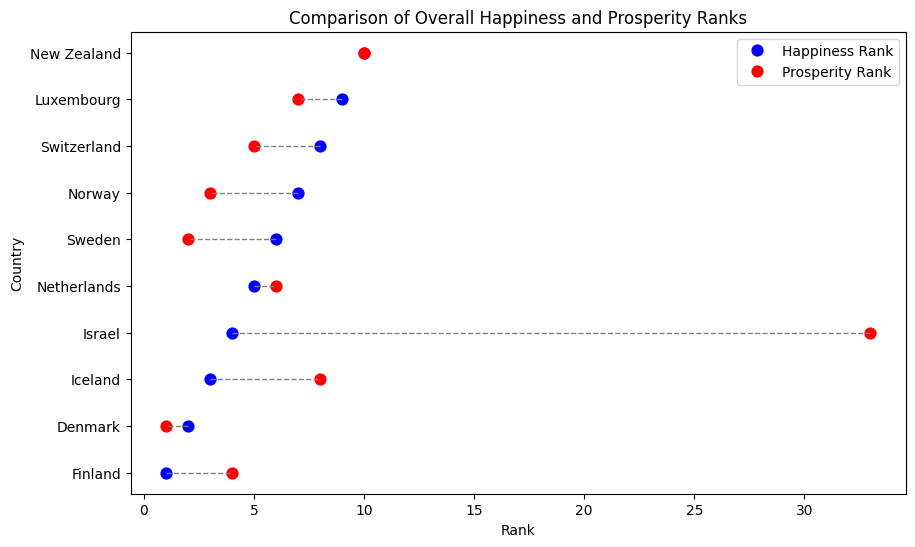

In [33]:
# Visualize Comparison between ranks
score_comparison_df = pd.DataFrame({
    'Country': ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands',
                'Sweden', 'Norway', 'Switzerland', 'Luxembourg', 'New Zealand'],
    'Overall Happiness Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Overall Prosperity Rank': [4, 1, 8, 33, 6, 2, 3, 5, 7, 10]
})
score_comparison_df.set_index('Country', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the points for Overall Happiness Rank
sns.pointplot(x=score_comparison_df['Overall Happiness Rank'], y=score_comparison_df.index,
              color='blue', label='Happiness Rank', markers='o', linestyles='')

# Plotting the points for Overall Prosperity Rank
sns.pointplot(x=score_comparison_df['Overall Prosperity Rank'], y=score_comparison_df.index,
              color='red', label='Prosperity Rank', markers='o', linestyles='')

# Connecting lines
for country in score_comparison_df.index:
    plt.plot([score_comparison_df.loc[country, 'Overall Happiness Rank'],
              score_comparison_df.loc[country, 'Overall Prosperity Rank']],
             [country, country], color='gray', linestyle='--', linewidth=1)

plt.xlabel('Rank')
plt.title('Comparison of Overall Happiness and Prosperity Ranks')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# display(hosp_rank_df.info())
# hosp_rank_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hospital Name      12002 non-null  object 
 1   Country Name       12002 non-null  object 
 2   Global Ranking     12002 non-null  object 
 3   Hospital Size      12002 non-null  object 
 4   Visibility         12002 non-null  object 
 5   Rich Files         12000 non-null  float64
 6   Scholarship Score  12000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.5+ KB


None

,Hospital Name,Country Name,Global Ranking,Hospital Size,Visibility,Rich Files,Scholarship Score
0,Cleveland Clinic,United States,1,230,5,17.0,11.0
1,St Jude Children's Research Hospital,United States,2,58,3,103.0,37.0
2,Johns Hopkins Medicine,United States,3,23,6,31.0,61.0
3,Mayo Clinic Scottsdale AZ,United States,4,125,1,987.0,94.0
4,University of Maryland Medical Center,United States,5,92,2,1262.0,34.0
5,M D Anderson Cancer Center,United States,6,97,14,25.0,39.0
6,Massachusetts General Hospital,United States,7,401,20,82.0,18.0
7,Assistance Publique Hôpitaux de Paris,France,8,96,67,10.0,43.0
8,Memorial Sloan Kettering Cancer Center,United States,9,26,18,619.0,107.0
9,New York Presbyterian / Lower Manhattan Hospital,United States,10,293,4,379.0,218.0


In [ ]:
# # Get the value counts of 'Country Name'
# country_counts = hosp_rank_df['Country Name'].value_counts().reset_index()

# # Rename the columns for clarity
# country_counts.columns = ['Country Name', 'Ranked Hospital Count']

# # Sort the DataFrame by the count values in descending order
# country_counts = country_counts.sort_values(by='Ranked Hospital Count', ascending=False)
# country_counts.head(20)

,Country Name,Ranked Hospital Count
0,United States,3619
1,Japan,918
2,Germany,822
3,China,705
4,United Kingdom,500
5,France,380
6,Spain,308
7,Canada,306
8,Italy,292
9,Turkey,260
